In [ ]:
# importing all the required libraries :
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
datapath = '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's first read in the image to see what we are working with :

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

img  = cv2.cvtColor(cv2.imread(datapath + "hw3_1.jpeg"),cv2.COLOR_BGR2RGB)

Let's see the shape of the image : i.e the dimensions we need to reduce 

In [ ]:
img.shape

(432, 768, 3)

In this case we have 432 rows and 768 columns, 3 indicating that we have three color values i.e r,g and b

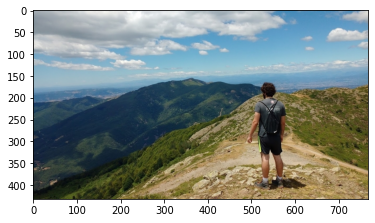

In [ ]:
plt.imshow(img)

In [ ]:
# let's condense the data into a dataframe :
m,n,r = img.shape
out_arr = pd.Dataout_arr = np.column_stack((np.repeat(np.arange(m),n),img.reshape(m*n,-1)))
out_df = pd.DataFrame(out_arr, index=None)
out_df.columns = ['0', 'red', 'green', 'blue']
out_df.head()

,0,red,green,blue
0,0,168,171,178
1,0,167,172,178
2,0,167,171,180
3,0,165,172,180
4,0,164,173,180


In [ ]:
out_df.describe()

,0,red,green,blue
count,331776.000000,331776.000000,331776.000000,331776.000000
mean,215.500000,113.476981,126.261529,121.604121
std,124.707512,61.654376,59.361060,70.912392
min,0.000000,0.000000,0.000000,0.000000
25%,107.750000,56.000000,69.000000,60.000000
50%,215.500000,119.000000,140.000000,107.000000
75%,323.250000,164.000000,179.000000,197.000000
max,431.000000,255.000000,255.000000,255.000000


#### Though we will use the intial array, it is good to plot the array into  a dataframe first to get an intuition about the values we are working with.
  - Here we see the maximum values for 'r', 'g', 'b' i.e 255, which we will use to standardize the dataset 

In [ ]:
# let's see the intial array :
img

array([[[168, 171, 178],
        [167, 172, 178],
        [167, 171, 180],
        ...,
        [214, 216, 215],
        [216, 215, 213],
        [216, 215, 211]],

       [[167, 170, 177],
        [166, 171, 177],
        [166, 170, 179],
        ...,
        [215, 215, 215],
        [219, 218, 214],
        [219, 218, 214]],

       [[166, 169, 178],
        [165, 169, 178],
        [165, 169, 178],
        ...,
        [216, 217, 212],
        [220, 219, 215],
        [222, 221, 216]],

       ...,

       [[ 26,  30,  15],
        [ 24,  31,  15],
        [ 24,  33,  16],
        ...,
        [171, 145,  94],
        [171, 145,  94],
        [166, 138,  88]],

       [[ 25,  32,  14],
        [ 25,  32,  14],
        [ 26,  35,  18],
        ...,
        [158, 135,  83],
        [163, 137,  86],
        [172, 147,  93]],

       [[ 26,  33,  15],
        [ 26,  33,  15],
        [ 26,  35,  18],
        ...,
        [166, 145,  92],
        [164, 138,  87],
        [170, 145,  91]]

In [ ]:
## splitting the r,g,b values and standardizing :
r, g, b = cv2.split(img)
r, g, b = r/255 , g/255 , b/255

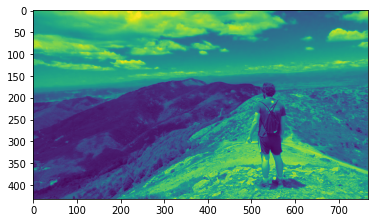

In [ ]:
# plotting the r,g,b values of the images seperately :
plt.imshow(r)

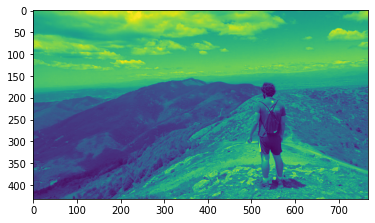

In [ ]:
plt.imshow(g)

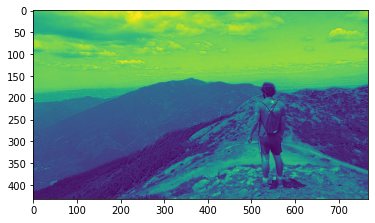

In [ ]:
plt.imshow(b)

---
## We will create 2 fucntions to implement PCA:
  1. Function **pca** : To transform each of the color matrices using the given number of pca components.
  2. Function **split_combine_pca** :
    - To split the given image array into its Red, Green and Blue values using the given image array.
    - To transfrom each of these color values using the above mentioned **pca** function.
    - Then, to finally combine the resulting color arrays and plotting the image using matplotlib's (plot) function.


In [ ]:

## 1 . First function to reduce the color_matrices :


def pca(color,dim):
  ### color :  color to be compressed
  ### dim : number of principal components
  
  # subtracting the mean from the color matrix
  covariance_mat = color - np.mean(color , axis = 0)
  covariance = np.cov(covariance_mat)
  
  # from the covariance matrix, creating eigen values and eigen vectors using numpy's linalg.eigh function:
  eigen_values, eigen_vectors = np.linalg.eigh(covariance) 
  
  # calulating the  size of the eigen_vector matrix :
  mat_size = np.size(eigen_vectors, axis =0)
  
  # sorting the eigen value matrix to get the maximum covaraince :
  sorted_values = np.argsort(eigen_values)
  
  # (by descending)
  sorted_values = sorted_values[::-1]
  
  # getting the final sorted matrix :
  eigen_vectors = eigen_vectors[:,sorted_values]
  eigen_values = eigen_values[sorted_values]
  
  #  using the number of principal components to finally reconstruct the image :
  if dim < mat_size or dim > 0:
    eigen_vectors = eigen_vectors[:, range(dim)]
    
  # dot product of the transpose of eigen_vectors and the covarince matrix:
  dot_values = np.dot(eigen_vectors.T, covariance_mat)
  
  # reconstructing the image from the dot_values : 
  reconstructed = np.dot(eigen_vectors, dot_values) + np.mean(color, axis = 0).T 
  
  # to remove complex eigen values 
  reconstructed_matrix = np.uint8(np.absolute(reconstructed))
  
  return reconstructed_matrix




## 2 . Function to split and combine the color matrices using the pca function :


def split_combine_pca(image,dim) :
  ## image : array after reading the image
  ## dim : number of principal components
  red_array   = image[:,:,0]
  green_array = image[:,:,1]
  blue_array  = image[:,:,2]

  reconstructed_red_array = pca(red_array,dim)
  reconstructed_green_array = pca(green_array,dim)
  reconstructed_blue_array = pca(blue_array,dim)

  # stacking the reconstructed arrays to give the final array:
  reconstructed_img = np.dstack((reconstructed_red_array, reconstructed_green_array, reconstructed_blue_array))

  # producing the final image:
  reconstructed_color_image = Image.fromarray(reconstructed_img)

  plt.imshow(reconstructed_color_image)

___ 
## Final Plotting :

Let's see how our function perfroms on the given image for a range of pca values :

The number of Principal components used to reconstruct the image : 100


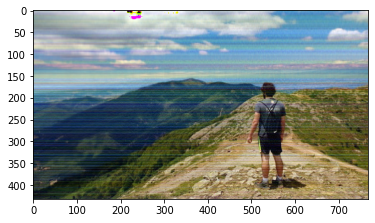



The number of Principal components used to reconstruct the image : 200


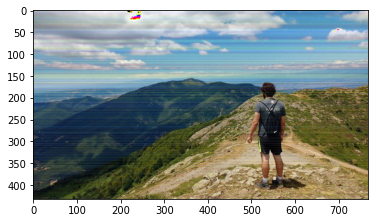



The number of Principal components used to reconstruct the image : 300


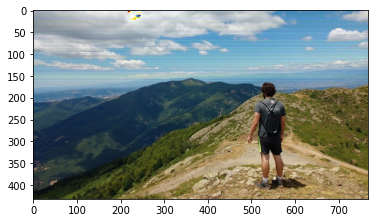



The number of Principal components used to reconstruct the image : 400


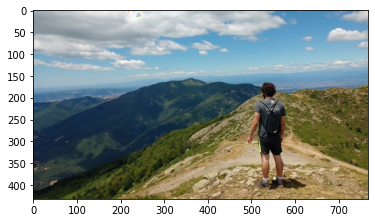

In [ ]:
pca_dims = [100,200,300,400]
for dims in pca_dims:
  print("\033[1m" + 'The number of Principal components used to reconstruct the image : ' + str(dims) + "\033[0m" )
  split_combine_pca(img,dims)
  plt.show()
  print('\n')